# Time Series Forecasting: Additive vs Multiplicative Decomposition

Options:
* This Example: `from statsmodels.tsa.seasonal import seasonal_decompose`
* Holt-Winters: `from statsmodels.tsa.holtwinters import ExponentialSmoothing`
* Facebook Prophet: `from fbprophet import Prophet`

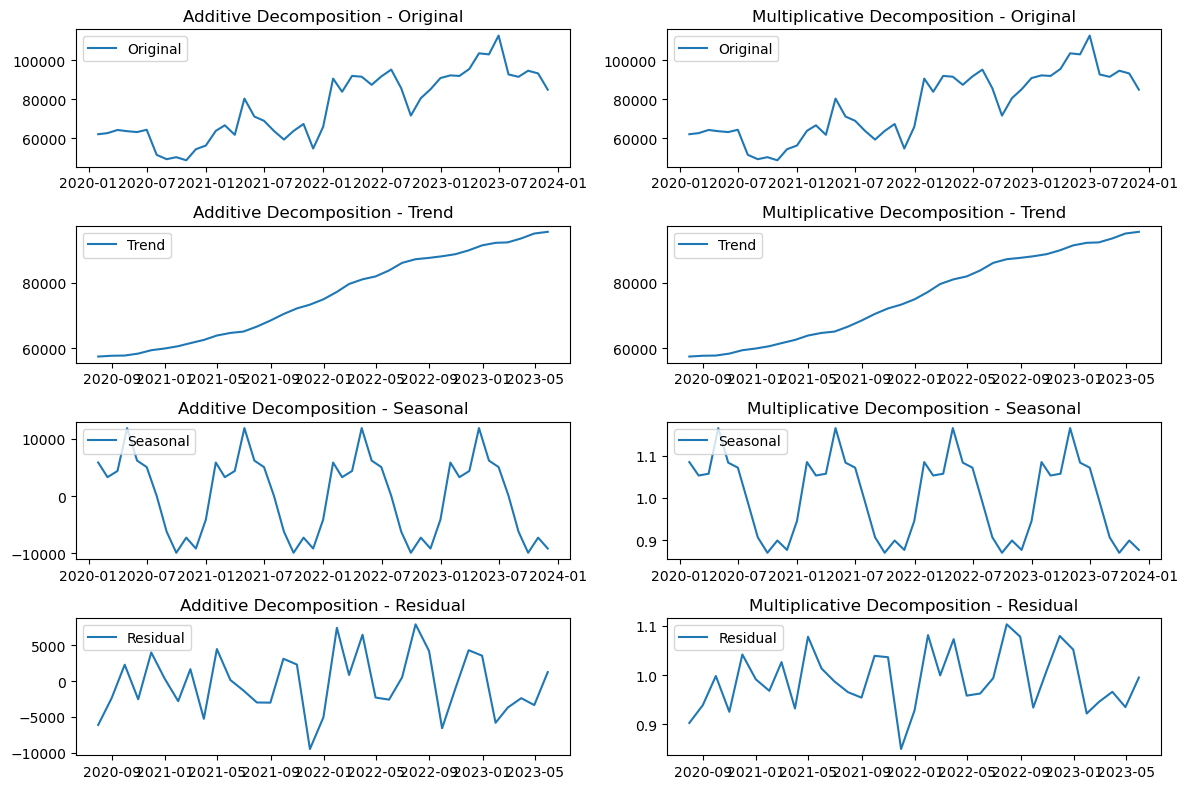

In [14]:
# comparing additive and multiplicative models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic sales data
date_range = pd.date_range(start='2020-01-01', end='2023-12-01', freq='M')
trend = np.linspace(50000, 100000, len(date_range))
seasonal = 10000 * np.sin(np.arange(len(date_range)) * (2 * np.pi / 12))
noise = np.random.normal(loc=0, scale=5000, size=len(date_range))
sales_data = pd.DataFrame({'date': date_range, 'sales': trend + seasonal + noise})
sales_data.set_index('date', inplace=True)

# Perform seasonal decomposition for both additive and multiplicative models
decomposition_additive = seasonal_decompose(sales_data['sales'], model='additive', period=12)
decomposition_multiplicative = seasonal_decompose(sales_data['sales'], model='multiplicative', period=12)

# Plot the decomposition side by side
plt.figure(figsize=(12, 8))

# Additive decomposition
plt.subplot(4, 2, 1)
plt.plot(sales_data.index, sales_data['sales'], label='Original')
plt.title('Additive Decomposition - Original')
plt.legend(loc='upper left')

plt.subplot(4, 2, 3)
plt.plot(decomposition_additive.trend.index, decomposition_additive.trend, label='Trend')
plt.title('Additive Decomposition - Trend')
plt.legend(loc='upper left')

plt.subplot(4, 2, 5)
plt.plot(decomposition_additive.seasonal.index, decomposition_additive.seasonal, label='Seasonal')
plt.title('Additive Decomposition - Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 2, 7)
plt.plot(decomposition_additive.resid.index, decomposition_additive.resid, label='Residual')
plt.title('Additive Decomposition - Residual')
plt.legend(loc='upper left')

# Multiplicative decomposition
plt.subplot(4, 2, 2)
plt.plot(sales_data.index, sales_data['sales'], label='Original')
plt.title('Multiplicative Decomposition - Original')
plt.legend(loc='upper left')

plt.subplot(4, 2, 4)
plt.plot(decomposition_multiplicative.trend.index, decomposition_multiplicative.trend, label='Trend')
plt.title('Multiplicative Decomposition - Trend')
plt.legend(loc='upper left')

plt.subplot(4, 2, 6)
plt.plot(decomposition_multiplicative.seasonal.index, decomposition_multiplicative.seasonal, label='Seasonal')
plt.title('Multiplicative Decomposition - Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 2, 8)
plt.plot(decomposition_multiplicative.resid.index, decomposition_multiplicative.resid, label='Residual')
plt.title('Multiplicative Decomposition - Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()